In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data=pd.read_csv("C:/Users/parit/Downloads/gas_turbines.csv")

In [3]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [6]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

<Axes: >

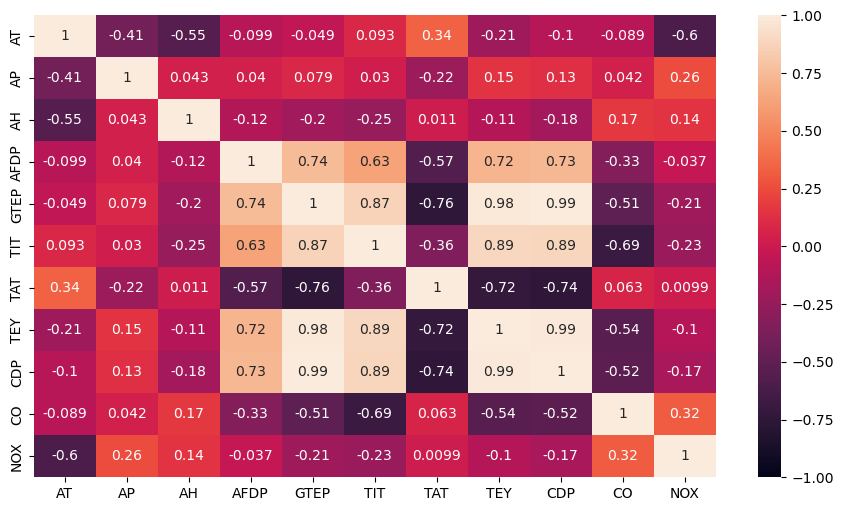

In [7]:
plt.figure(figsize=(11,6))
sns.heatmap(data.corr(),vmin=-1,annot=True)

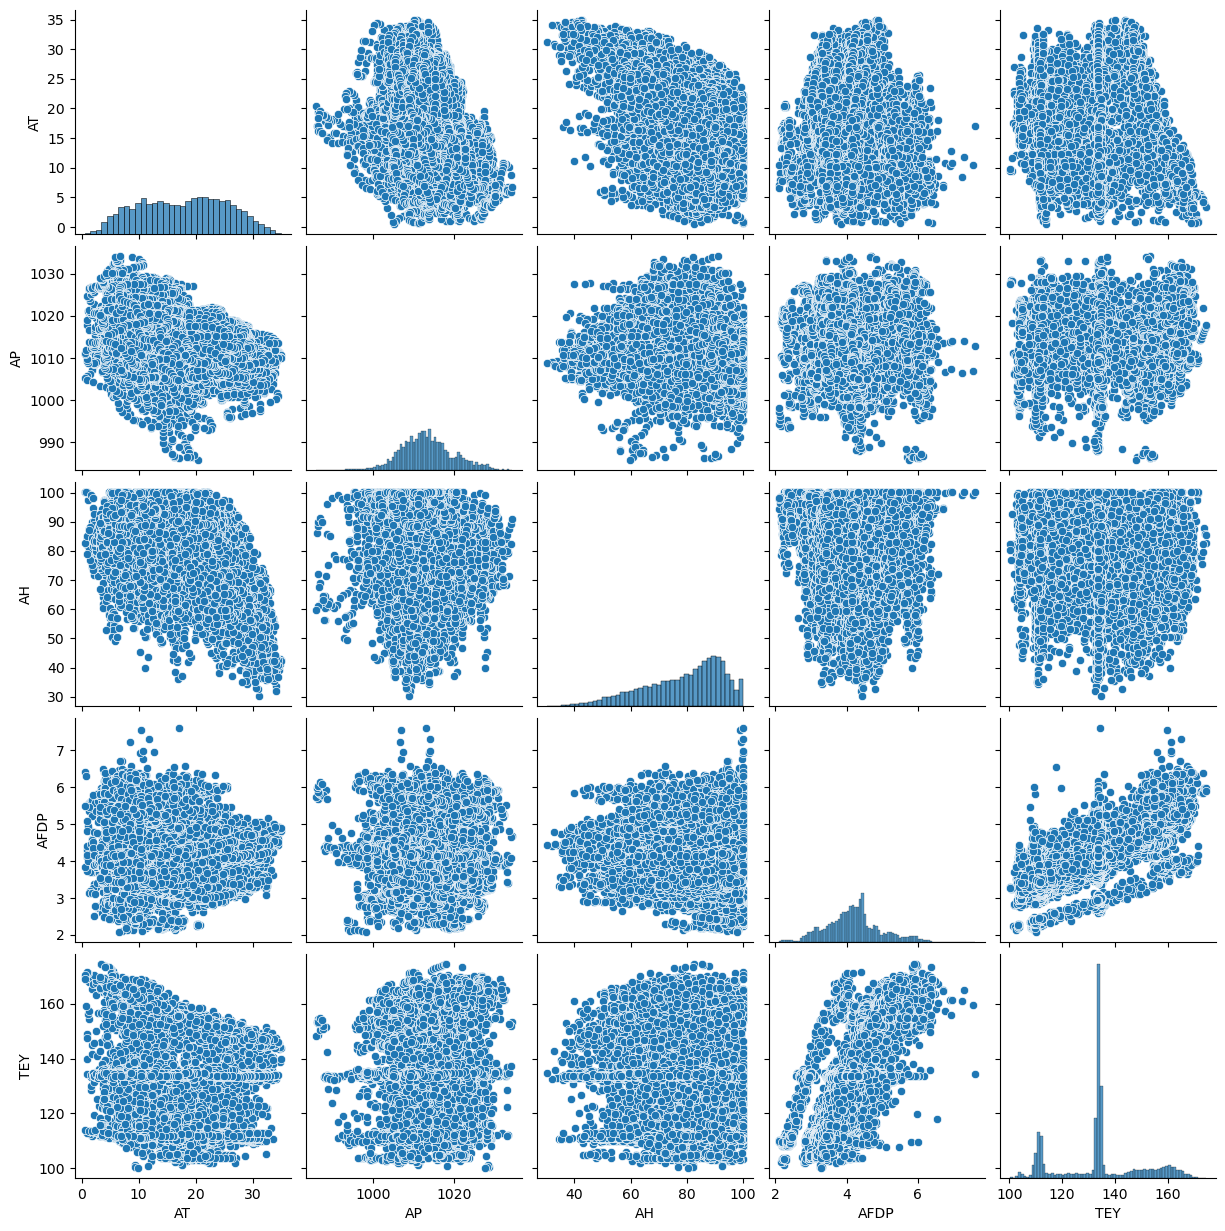

In [8]:
sns.pairplot(data[['AT', 'AP', 'AH', 'AFDP','TEY']])

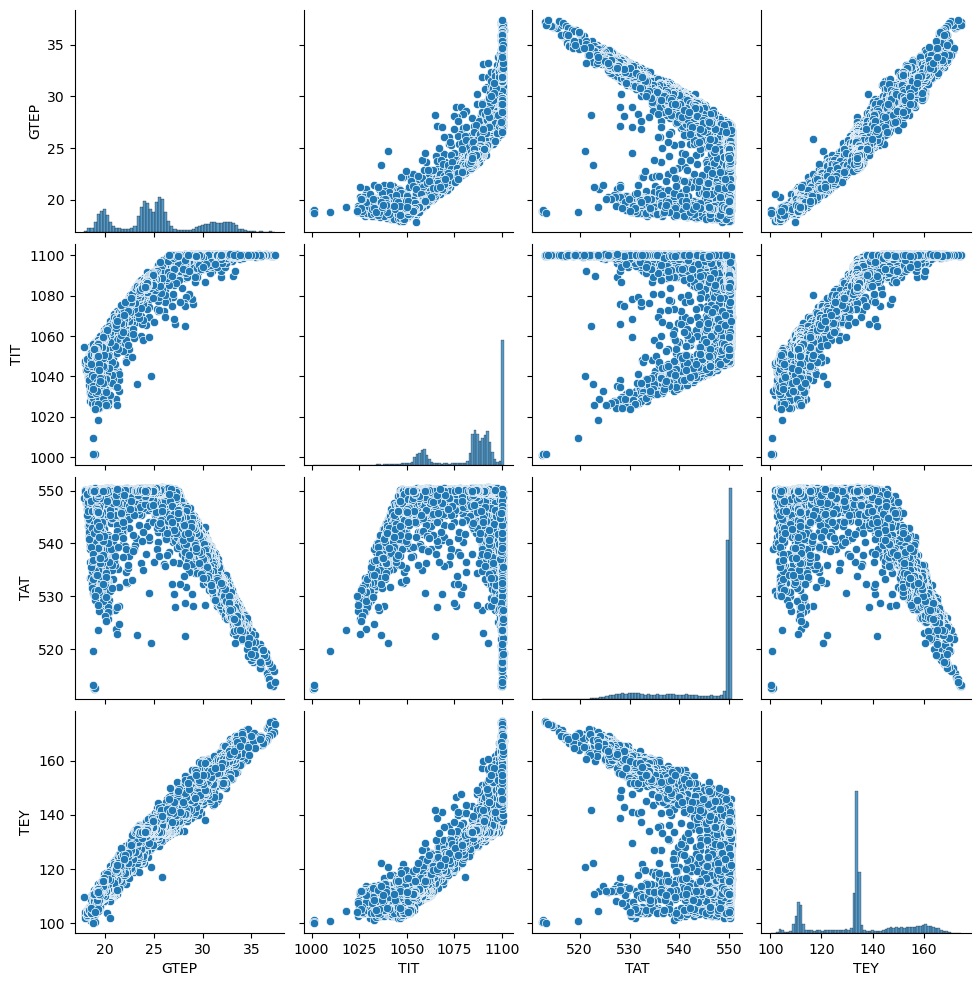

In [9]:
sns.pairplot(data[['GTEP', 'TIT', 'TAT', 'TEY']])

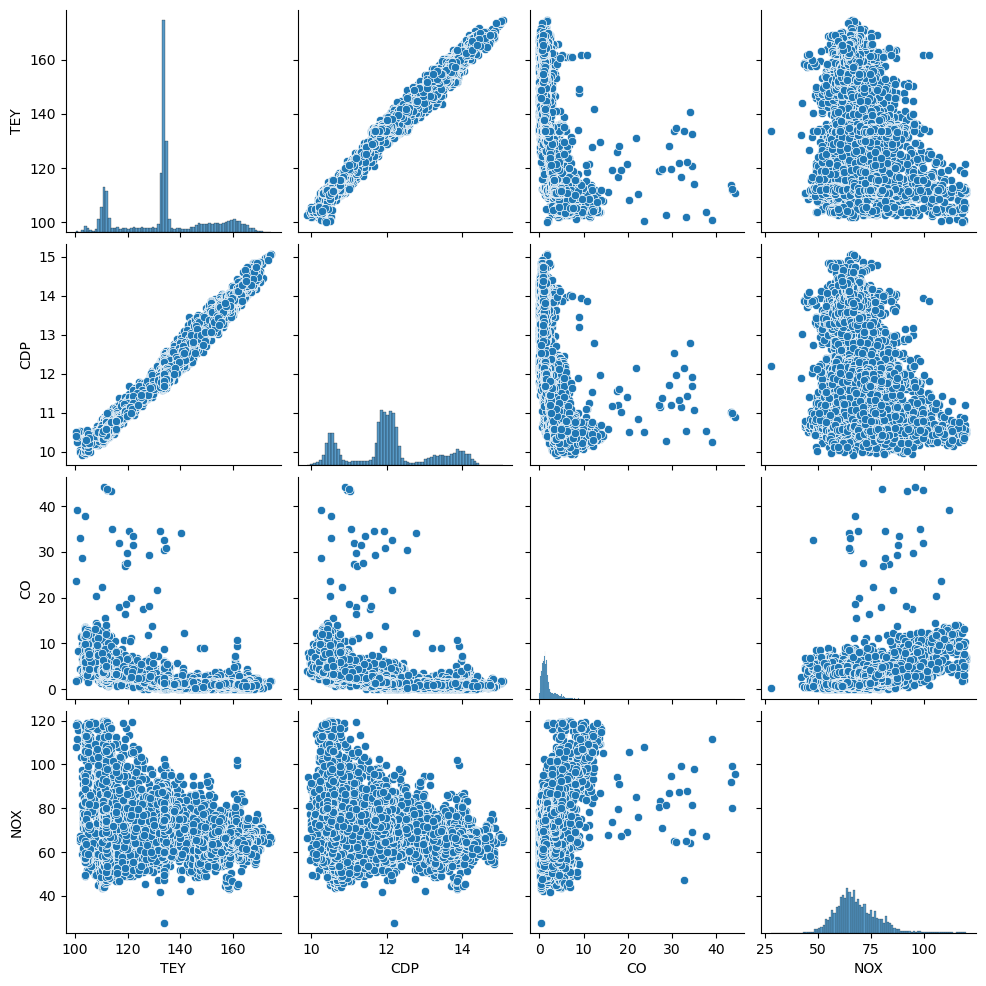

In [10]:
sns.pairplot(data[[ 'TEY', 'CDP', 'CO','NOX']])

In [11]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [12]:
x=data.drop(columns="TEY")
y=data["TEY"]

In [13]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.neural_network import MLPRegressor

In [17]:
mlp=MLPRegressor(hidden_layer_sizes=(6,5),random_state=42)

In [18]:
model=mlp.fit(x_train,y_train)

C:\Users\parit\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
pred=model.predict(x_test)
pred

array([133.26195458, 113.17283432, 132.68609294, ..., 144.5096724 ,
       149.18406186, 108.98815097])

In [20]:
from sklearn.metrics import r2_score

In [21]:
print("accuracy score for training data =",model.score(x_train,y_train))
print("accuracy score for testing data =",r2_score(y_test,pred))

accuracy score for training data = 0.9886312386084697
accuracy score for testing data = 0.9883848363961606


In [22]:
x_test.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
13312,24.093,1010.2,75.821,4.0023,25.762,1092.5,550.25,12.219,1.2643,60.954
12627,20.450,1014.4,90.471,3.2106,20.085,1059.6,549.94,10.791,2.6937,56.658
6393,20.262,1012.5,82.892,4.5325,25.221,1089.9,549.62,12.126,1.9625,64.937
4990,26.862,1012.3,70.267,4.4266,25.965,1092.9,549.96,12.218,1.5712,64.836
12462,19.409,1006.3,90.525,3.1241,19.688,1056.9,550.01,10.466,2.2996,58.706


In [23]:
x_test["Actual"]=y_test
x_test["Predicted"]=pred
x_test.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,Actual,Predicted
13312,24.093,1010.2,75.821,4.0023,25.762,1092.5,550.25,12.219,1.2643,60.954,134.46,133.261955
12627,20.450,1014.4,90.471,3.2106,20.085,1059.6,549.94,10.791,2.6937,56.658,111.88,113.172834
6393,20.262,1012.5,82.892,4.5325,25.221,1089.9,549.62,12.126,1.9625,64.937,133.72,132.686093
4990,26.862,1012.3,70.267,4.4266,25.965,1092.9,549.96,12.218,1.5712,64.836,133.79,133.158374
12462,19.409,1006.3,90.525,3.1241,19.688,1056.9,550.01,10.466,2.2996,58.706,110.77,112.005919
